# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

count = 1

# set up lists to hold reponse info
lat = []
long = []
max_temp = []
city_name = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    print(json.dumps(response, indent = 4, sort_keys = True))
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        city_name.append(response['name'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing City: {city} {count}")
        count = count + 1
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 50.6789,
        "lon": 156.125
    },
    "dt": 1612925460,
    "id": 2121385,
    "main": {
        "feels_like": 17.76,
        "grnd_level": 994,
        "humidity": 89,
        "pressure": 994,
        "sea_level": 994,
        "temp": 27.86,
        "temp_max": 27.86,
        "temp_min": 27.86
    },
    "name": "Severo-Kuril'sk",
    "sys": {
        "country": "RU",
        "sunrise": 1612904238,
        "sunset": 1612939337
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 9.98
    }
}
Processing City: severo-kurilsk 1
------------
{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": -9

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 71.9667,
        "lon": 102.5
    },
    "dt": 1612925433,
    "id": 2022572,
    "main": {
        "feels_like": -25.42,
        "grnd_level": 1004,
        "humidity": 84,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": -14.22,
        "temp_max": -14.22,
        "temp_min": -14.22
    },
    "name": "Khatanga",
    "sys": {
        "country": "RU",
        "sunrise": 1612924489,
        "sunset": 1612944826
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 96,
        "speed": 7.76
    }
}
Processing City: khatanga 11
------------
{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,
    "coord": {
        "lat": -34.5322,
        

{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,
    "coord": {
        "lat": 10.346,
        "lon": 107.0843
    },
    "dt": 1612925464,
    "id": 1562414,
    "main": {
        "feels_like": 83.91,
        "grnd_level": 1011,
        "humidity": 72,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 80.28,
        "temp_max": 80.28,
        "temp_min": 80.28
    },
    "name": "Vung Tau",
    "sys": {
        "country": "VN",
        "sunrise": 1612912392,
        "sunset": 1612954723
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 78,
        "speed": 7.47
    }
}
Processing City: vung tau 22
------------
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -6.0989,
     

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 48.6814,
        "lon": 71.6433
    },
    "dt": 1612925467,
    "id": 1526041,
    "main": {
        "feels_like": -27.02,
        "grnd_level": 967,
        "humidity": 89,
        "pressure": 1034,
        "sea_level": 1034,
        "temp": -15.18,
        "temp_max": -15.18,
        "temp_min": -15.18
    },
    "name": "Atas\u016b",
    "sys": {
        "country": "KZ",
        "sunrise": 1612924198,
        "sunset": 1612959929
    },
    "timezone": 21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 244,
        "speed": 8.93
    }
}
Processing City: atasu 32
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.65,
  

{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": -17.7125,
        "lon": -39.2481
    },
    "dt": 1612925470,
    "id": 3466980,
    "main": {
        "feels_like": 79.09,
        "grnd_level": 1014,
        "humidity": 83,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 74.59,
        "temp_max": 74.59,
        "temp_min": 74.59
    },
    "name": "Caravelas",
    "sys": {
        "country": "BR",
        "sunrise": 1612859316,
        "sunset": 1612905236
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 52,
        "speed": 4.74
    }
}
Processing City: caravelas 42
------------
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -9.4431

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -14.9003,
        "lon": 50.2788
    },
    "dt": 1612925472,
    "id": 1071296,
    "main": {
        "feels_like": 81.43,
        "grnd_level": 1011,
        "humidity": 92,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 74.91,
        "temp_max": 74.91,
        "temp_min": 74.91
    },
    "name": "Antalaha",
    "rain": {
        "1h": 0.26
    },
    "sys": {
        "country": "MG",
        "sunrise": 1612924443,
        "sunset": 1612969940
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 267,
        "speed": 4.23
    }
}
Processing City: antalaha 52
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
-

{
    "base": "stations",
    "clouds": {
        "all": 70
    },
    "cod": 200,
    "coord": {
        "lat": 45.9339,
        "lon": 133.7225
    },
    "dt": 1612925477,
    "id": 2025159,
    "main": {
        "feels_like": 1.56,
        "grnd_level": 1010,
        "humidity": 94,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 11.73,
        "temp_max": 11.73,
        "temp_min": 11.73
    },
    "name": "Dalnerechensk",
    "snow": {
        "1h": 0.316
    },
    "sys": {
        "country": "RU",
        "sunrise": 1612908951,
        "sunset": 1612945378
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 238,
        "speed": 7.83
    }
}
Processing City: dalnerechensk 61
------------
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 20

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": -0.2202,
        "lon": 100.6308
    },
    "dt": 1612925485,
    "id": 1631905,
    "main": {
        "feels_like": 89.56,
        "grnd_level": 955,
        "humidity": 61,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 83.16,
        "temp_max": 83.16,
        "temp_min": 83.16
    },
    "name": "Payakumbuh",
    "sys": {
        "country": "ID",
        "sunrise": 1612913287,
        "sunset": 1612956926
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 204,
        "speed": 0.67
    }
}
Processing City: payakumbuh 71
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.7,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 39.05,
        "lon": -27.9833
    },
    "dt": 1612925489,
    "id": 3372964,
    "main": {
        "feels_like": 52.3,
        "grnd_level": 996,
        "humidity": 85,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 59.02,
        "temp_max": 59.02,
        "temp_min": 59.02
    },
    "name": "Lagoa",
    "sys": {
        "country": "PT",
        "sunrise": 1612946959,
        "sunset": 1612984990
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 238,
        "speed": 14.41
    }
}
Processing City: lagoa 82
------------
{
    "base": "stations",
    "clouds": {
        "all": 41
    },
    "cod": 200,
    "coord": {
        "lat": -23.1203,
        

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 62.0025,
        "lon": 132.4325
    },
    "dt": 1612925491,
    "id": 2025241,
    "main": {
        "feels_like": -19.79,
        "grnd_level": 997,
        "humidity": 87,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": -11.83,
        "temp_max": -11.83,
        "temp_min": -11.83
    },
    "name": "Churapcha",
    "sys": {
        "country": "RU",
        "sunrise": 1612912309,
        "sunset": 1612942639
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 352,
        "speed": 2.13
    }
}
Processing City: churapcha 93
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",

{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": 47.8667,
        "lon": 88.1167
    },
    "dt": 1612925492,
    "id": 1529651,
    "main": {
        "feels_like": -1.55,
        "grnd_level": 917,
        "humidity": 82,
        "pressure": 1031,
        "sea_level": 1031,
        "temp": 5.41,
        "temp_max": 5.41,
        "temp_min": 5.41
    },
    "name": "Altay",
    "sys": {
        "country": "CN",
        "sunrise": 1612920137,
        "sunset": 1612956083
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 72,
        "speed": 1.28
    }
}
Processing City: altay 103
------------
{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": 3.0707,
        "lon": 172

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -2.5744,
        "lon": 150.7967
    },
    "dt": 1612925496,
    "id": 2094342,
    "main": {
        "feels_like": 90.61,
        "grnd_level": 1005,
        "humidity": 74,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 84.58,
        "temp_max": 84.58,
        "temp_min": 84.58
    },
    "name": "Kavieng",
    "rain": {
        "1h": 0.2
    },
    "sys": {
        "country": "PG",
        "sunrise": 1612901101,
        "sunset": 1612945031
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 61,
        "speed": 8.05
    }
}
Processing City: kavieng 113
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord

{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": -3.7508,
        "lon": 103.6372
    },
    "dt": 1612925497,
    "id": 1638775,
    "main": {
        "feels_like": 91.26,
        "grnd_level": 1001,
        "humidity": 65,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 84.63,
        "temp_max": 84.63,
        "temp_min": 84.63
    },
    "name": "Payo",
    "sys": {
        "country": "ID",
        "sunrise": 1612912348,
        "sunset": 1612956422
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 324,
        "speed": 3.22
    }
}
Processing City: payo 123
------------
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": -30.7414,
        "

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 33.0833,
        "lon": -16.3333
    },
    "dt": 1612925499,
    "id": 2270385,
    "main": {
        "feels_like": 59.85,
        "humidity": 88,
        "pressure": 1019,
        "temp": 60.8,
        "temp_max": 60.8,
        "temp_min": 60.8
    },
    "name": "Camacha",
    "sys": {
        "country": "PT",
        "id": 6902,
        "sunrise": 1612943618,
        "sunset": 1612982738,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 5.75
    }
}
Processing City: camacha 134
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 62.456,
        "lon": -114.3525
    },

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -24.2083,
        "lon": -50.9494
    },
    "dt": 1612925501,
    "id": 3455777,
    "main": {
        "feels_like": 62.08,
        "grnd_level": 927,
        "humidity": 85,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 61.45,
        "temp_max": 61.45,
        "temp_min": 61.45
    },
    "name": "Ortigueira",
    "sys": {
        "country": "BR",
        "sunrise": 1612861648,
        "sunset": 1612908521
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 71,
        "speed": 2.73
    }
}
Processing City: ortigueira 144
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 32.29

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -12.7887,
        "lon": 45.2699
    },
    "dt": 1612925503,
    "id": 921900,
    "main": {
        "feels_like": 88.3,
        "humidity": 89,
        "pressure": 1009,
        "temp": 80.6,
        "temp_max": 80.6,
        "temp_min": 80.6
    },
    "name": "Dzaoudzi",
    "sys": {
        "country": "YT",
        "id": 2131,
        "sunrise": 1612925785,
        "sunset": 1612971002,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 6.91
    }
}
Processing City: dzaoudzi 155
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 36.365,
        "lon": 6.6147
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": 46.6806,
        "lon": 113.2792
    },
    "dt": 1612925507,
    "id": 2032614,
    "main": {
        "feels_like": 4.59,
        "grnd_level": 898,
        "humidity": 91,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 18.48,
        "temp_max": 18.48,
        "temp_min": 18.48
    },
    "name": "Baruun-Urt",
    "sys": {
        "country": "MN",
        "sunrise": 1612913947,
        "sunset": 1612950194
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 234,
        "speed": 15.21
    }
}
Processing City: baruun-urt 166
------------
{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": 14.533

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 64.8621,
        "lon": 11.2373
    },
    "dt": 1612925510,
    "id": 3141310,
    "main": {
        "feels_like": 11.86,
        "grnd_level": 1024,
        "humidity": 88,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 23.83,
        "temp_max": 23.83,
        "temp_min": 23.83
    },
    "name": "R\u00f8rvik",
    "sys": {
        "country": "NO",
        "sunrise": 1612942283,
        "sunset": 1612970839
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 105,
        "speed": 12.53
    }
}
Processing City: rorvik 176
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -8.7386,
       

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 58.0728,
        "lon": 93.0344
    },
    "dt": 1612925512,
    "id": 1490805,
    "main": {
        "feels_like": -12.35,
        "grnd_level": 1007,
        "humidity": 89,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": -0.27,
        "temp_max": -0.27,
        "temp_min": -0.27
    },
    "name": "Strelka",
    "sys": {
        "country": "RU",
        "sunrise": 1612920730,
        "sunset": 1612953129
    },
    "timezone": 25200,
    "visibility": 1332,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 236,
        "speed": 10.07
    }
}
Processing City: strelka 187
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "station

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.123,
        "lon": -92.5366
    },
    "dt": 1612925514,
    "id": 5264475,
    "main": {
        "feels_like": -11.33,
        "humidity": 55,
        "pressure": 1027,
        "temp": -0.71,
        "temp_max": 1.4,
        "temp_min": -2.2
    },
    "name": "New Richmond",
    "sys": {
        "country": "US",
        "id": 5687,
        "sunrise": 1612876783,
        "sunset": 1612913348,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 6.91
    }
}
Processing City: new richmond 197
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -36.8333,
        "lon": 1

{
    "base": "stations",
    "clouds": {
        "all": 15
    },
    "cod": 200,
    "coord": {
        "lat": 3.0833,
        "lon": -59.95
    },
    "dt": 1612925516,
    "id": 3405215,
    "main": {
        "feels_like": 78.87,
        "grnd_level": 1000,
        "humidity": 60,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 79.9,
        "temp_max": 79.9,
        "temp_min": 79.9
    },
    "name": "Bonfim",
    "rain": {
        "1h": 1.1322
    },
    "sys": {
        "country": "BR",
        "sunrise": 1612865631,
        "sunset": 1612908859
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 11.01
    }
}
Processing City: bonfim 208
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -38.2667,
        "lon": 141.9667
    },
    "dt": 1612925518,
    "id": 2171099,
    "main": {
        "feels_like": 79.25,
        "grnd_level": 1010,
        "humidity": 36,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 82.81,
        "temp_max": 82.81,
        "temp_min": 82.81
    },
    "name": "Codrington",
    "sys": {
        "country": "AU",
        "sunrise": 1612900511,
        "sunset": 1612949860
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 162,
        "speed": 8.05
    }
}
Processing City: codrington 218
------------
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": -30.1811,
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.7333,
        "lon": 68.3
    },
    "dt": 1612925519,
    "id": 1516595,
    "main": {
        "feels_like": 44.53,
        "grnd_level": 990,
        "humidity": 72,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 48.4,
        "temp_max": 48.4,
        "temp_min": 48.4
    },
    "name": "Zhetysay",
    "sys": {
        "country": "KZ",
        "sunrise": 1612924041,
        "sunset": 1612961691
    },
    "timezone": 21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 98,
        "speed": 2.86
    }
}
Processing City: zhetysay 228
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 17.0151,
        "

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 30.3322,
        "lon": -81.6556
    },
    "dt": 1612925521,
    "id": 4160021,
    "main": {
        "feels_like": 60.35,
        "humidity": 94,
        "pressure": 1021,
        "temp": 59.74,
        "temp_max": 61,
        "temp_min": 59
    },
    "name": "Jacksonville",
    "sys": {
        "country": "US",
        "id": 3704,
        "sunrise": 1612872707,
        "sunset": 1612912202,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 3.44
    }
}
Processing City: jacksonville 239
------------
{
    "base": "stations",
    "clouds": {
        "all": 19
    },
    "cod": 200,
    "coord": {
        "lat": 65.75,
        "lon": 150.8

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 17.9716,
        "lon": -66.908
    },
    "dt": 1612925524,
    "id": 4565090,
    "main": {
        "feels_like": 75.56,
        "humidity": 63,
        "pressure": 1017,
        "temp": 73.4,
        "temp_max": 75.99,
        "temp_min": 71.01
    },
    "name": "Gu\u00e1nica",
    "sys": {
        "country": "PR",
        "id": 2018836,
        "sunrise": 1612868256,
        "sunset": 1612909573,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 98,
        "speed": 1.99
    }
}
Processing City: guanica 250
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -14.8796,
        "l

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 28.4532,
        "lon": 117.9686
    },
    "dt": 1612925526,
    "id": 1787858,
    "main": {
        "feels_like": 43.83,
        "grnd_level": 1013,
        "humidity": 92,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 48,
        "temp_max": 48,
        "temp_min": 48
    },
    "name": "Shangrao",
    "rain": {
        "1h": 1.0988
    },
    "sys": {
        "country": "CN",
        "sunrise": 1612911027,
        "sunset": 1612950864
    },
    "timezone": 28800,
    "visibility": 7514,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 61,
        "speed": 5.68
    }
}
Processing City: shangrao 260
------------
{
    "base": "stations",
    "clouds": {
        "all": 74
    },
    "cod": 200,
    "coord"

{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": 7.4167,
        "lon": 81.8167
    },
    "dt": 1612925528,
    "id": 1242110,
    "main": {
        "feels_like": 75.42,
        "grnd_level": 1012,
        "humidity": 76,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 75.04,
        "temp_max": 75.04,
        "temp_min": 75.04
    },
    "name": "Kalmunai",
    "sys": {
        "country": "LK",
        "sunrise": 1612918273,
        "sunset": 1612960971
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 348,
        "speed": 10.27
    }
}
Processing City: kalmunai 270
------------
{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 17.9583,
   

{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": 61.994,
        "lon": -49.6678
    },
    "dt": 1612925530,
    "id": 3421193,
    "main": {
        "feels_like": 16.02,
        "grnd_level": 1021,
        "humidity": 83,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 26.65,
        "temp_max": 26.65,
        "temp_min": 26.65
    },
    "name": "Paamiut",
    "sys": {
        "country": "GL",
        "sunrise": 1612869696,
        "sunset": 1612899858
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 10.4
    }
}
Processing City: paamiut 281
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.5539,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.5982,
        "lon": -124.1573
    },
    "dt": 1612925532,
    "id": 5563839,
    "main": {
        "feels_like": 43.56,
        "humidity": 100,
        "pressure": 1019,
        "temp": 47.91,
        "temp_max": 48.99,
        "temp_min": 46.4
    },
    "name": "Fortuna",
    "sys": {
        "country": "US",
        "id": 4127,
        "sunrise": 1612883850,
        "sunset": 1612921460,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 6.91
    }
}
Processing City: fortuna 292
------------
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 13.8065,
        "lon": -1

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 46.5389,
        "lon": 138.3297
    },
    "dt": 1612925534,
    "id": 2015852,
    "main": {
        "feels_like": 11.37,
        "grnd_level": 1006,
        "humidity": 82,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 20.37,
        "temp_max": 20.37,
        "temp_min": 20.37
    },
    "name": "Svetlaya",
    "sys": {
        "country": "RU",
        "sunrise": 1612907923,
        "sunset": 1612944194
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 292,
        "speed": 6.46
    }
}
Processing City: svetlaya 303
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -37.8333,
        

{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": -4.1967,
        "lon": 152.1721
    },
    "dt": 1612925409,
    "id": 2087894,
    "main": {
        "feels_like": 87.98,
        "grnd_level": 1002,
        "humidity": 77,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 83.46,
        "temp_max": 83.46,
        "temp_min": 83.46
    },
    "name": "Rabaul",
    "rain": {
        "1h": 0.28
    },
    "sys": {
        "country": "PG",
        "sunrise": 1612900671,
        "sunset": 1612944802
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 337,
        "speed": 10.85
    }
}
Processing City: rabaul 313
------------
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 12.2605,
        "lon": 121.9926
    },
    "dt": 1612925537,
    "id": 1705645,
    "main": {
        "feels_like": 81.01,
        "grnd_level": 1008,
        "humidity": 84,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 77.25,
        "temp_max": 77.25,
        "temp_min": 77.25
    },
    "name": "Looc",
    "sys": {
        "country": "PH",
        "sunrise": 1612908936,
        "sunset": 1612951023
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 19,
        "speed": 8.75
    }
}
Processing City: looc 324
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 64.8569,
        

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 40.3973,
        "lon": -91.3849
    },
    "dt": 1612925541,
    "id": 4863349,
    "main": {
        "feels_like": -2.34,
        "humidity": 66,
        "pressure": 1030,
        "temp": 6.26,
        "temp_max": 8.01,
        "temp_min": 5
    },
    "name": "Keokuk",
    "sys": {
        "country": "US",
        "id": 3996,
        "sunrise": 1612875969,
        "sunset": 1612913609,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 26,
        "speed": 3.91
    }
}
Processing City: keokuk 334
------------
{
    "base": "stations",
    "clouds": {
        "all": 19
    },
    "cod": 200,
    "coord": {
        "lat": 55.2822,
        "lon": 65.3175
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -12.6,
        "lon": -69.1833
    },
    "dt": 1612925543,
    "id": 3931470,
    "main": {
        "feels_like": 85.42,
        "grnd_level": 989,
        "humidity": 97,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 75.7,
        "temp_max": 75.7,
        "temp_min": 75.7
    },
    "name": "Puerto Maldonado",
    "sys": {
        "country": "PE",
        "sunrise": 1612866852,
        "sunset": 1612912070
    },
    "timezone": -18000,
    "visibility": 7916,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 54,
        "speed": 0.92
    }
}
Processing City: puerto maldonado 345
------------
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat":

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 43.3236,
        "lon": 145.575
    },
    "dt": 1612925545,
    "id": 2128975,
    "main": {
        "feels_like": 15.78,
        "humidity": 54,
        "pressure": 1006,
        "temp": 26.6,
        "temp_max": 26.6,
        "temp_min": 26.6
    },
    "name": "Nemuro",
    "sys": {
        "country": "JP",
        "id": 7976,
        "sunrise": 1612905795,
        "sunset": 1612942844,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 9.22
    }
}
Processing City: nemuro 355
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 28.017,
        "lon": -97.5169


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -3.2033,
        "lon": -52.2064
    },
    "dt": 1612925547,
    "id": 3407882,
    "main": {
        "feels_like": 78.6,
        "grnd_level": 1000,
        "humidity": 98,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 72.46,
        "temp_max": 72.46,
        "temp_min": 72.46
    },
    "name": "Altamira",
    "sys": {
        "country": "BR",
        "sunrise": 1612863380,
        "sunset": 1612907392
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 26,
        "speed": 4.36
    }
}
Processing City: altamira 365
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 71.6872,

{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod": 200,
    "coord": {
        "lat": 23.5333,
        "lon": 77.8167
    },
    "dt": 1612925548,
    "id": 1253200,
    "main": {
        "feels_like": 51.62,
        "humidity": 94,
        "pressure": 1015,
        "temp": 53.6,
        "temp_max": 53.6,
        "temp_min": 53.6
    },
    "name": "Vidisha",
    "sys": {
        "country": "IN",
        "id": 9063,
        "sunrise": 1612920292,
        "sunset": 1612960872,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 4000,
    "weather": [
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 4.61
    }
}
Processing City: vidisha 375
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 14.8961,
        "lon": -24.4956
    },
    "dt": 1612925551,
    "id": 3374210,
    "main": {
        "feels_like": 69.03,
        "grnd_level": 1002,
        "humidity": 76,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 70.07,
        "temp_max": 70.07,
        "temp_min": 70.07
    },
    "name": "S\u00e3o Filipe",
    "sys": {
        "country": "CV",
        "sunrise": 1612944254,
        "sunset": 1612986020
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 78,
        "speed": 9.15
    }
}
Processing City: sao filipe 385
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 36.6439,
        "lon": 33.4389
    },
    "dt": 1612925299,
    "id": 304013,
    "main": {
        "feels_like": 44.73,
        "grnd_level": 982,
        "humidity": 61,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 50.67,
        "temp_max": 50.67,
        "temp_min": 50.67
    },
    "name": "Mut",
    "sys": {
        "country": "TR",
        "sunrise": 1612931998,
        "sunset": 1612970468
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 138,
        "speed": 5.86
    }
}
Processing City: mut 396
------------
{
    "base": "stations",
    "clouds": {
        "all": 56
    },
    "cod": 200,
    "coord": {
        "lat": -32.6833,
        "lon": -57.6

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.25,
        "lon": -2.5
    },
    "dt": 1612925554,
    "id": 3336897,
    "main": {
        "feels_like": 36.18,
        "humidity": 100,
        "pressure": 1000,
        "temp": 39.2,
        "temp_max": 39.2,
        "temp_min": 39.2
    },
    "name": "La Rioja",
    "sys": {
        "country": "ES",
        "id": 6418,
        "sunrise": 1612941181,
        "sunset": 1612978535,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 4600,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.14
    }
}
Processing City: la rioja 406
------------
{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": -22.116,
        "lon": 14.2845
    },
    "dt": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -21.0415,
        "lon": -57.8738
    },
    "dt": 1612925558,
    "id": 3438102,
    "main": {
        "feels_like": 74.68,
        "grnd_level": 1000,
        "humidity": 70,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 73.36,
        "temp_max": 73.36,
        "temp_min": 73.36
    },
    "name": "Fuerte Olimpo",
    "sys": {
        "country": "PY",
        "sunrise": 1612863549,
        "sunset": 1612909944
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 219,
        "speed": 5.53
    }
}
Processing City: fuerte olimpo 416
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.5683,
        "lon": 126.9778
    },
    "dt": 1612925352,
    "id": 1835848,
    "main": {
        "feels_like": 30.2,
        "humidity": 70,
        "pressure": 1025,
        "temp": 39.22,
        "temp_max": 41,
        "temp_min": 37.4
    },
    "name": "Seoul",
    "sys": {
        "country": "KR",
        "id": 8105,
        "sunrise": 1612909652,
        "sunset": 1612947914,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 9.22
    }
}
Processing City: seoul 427
------------
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.7333,
        "lon": -25.6667
    }

{
    "base": "stations",
    "clouds": {
        "all": 67
    },
    "cod": 200,
    "coord": {
        "lat": -17.1717,
        "lon": -71.7931
    },
    "dt": 1612925564,
    "id": 3931255,
    "main": {
        "feels_like": 74.03,
        "grnd_level": 1012,
        "humidity": 82,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 71.26,
        "temp_max": 71.26,
        "temp_min": 71.26
    },
    "name": "Punta de Bomb\u00f3n",
    "sys": {
        "country": "PE",
        "sunrise": 1612867168,
        "sunset": 1612913007
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 112,
        "speed": 4.83
    }
}
Processing City: punta de bombon 437
------------
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -5.4333,
        "lon": 38.9667
    },
    "dt": 1612925568,
    "id": 150793,
    "main": {
        "feels_like": 80.53,
        "grnd_level": 1006,
        "humidity": 85,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 77.09,
        "temp_max": 77.09,
        "temp_min": 77.09
    },
    "name": "Pangani",
    "rain": {
        "1h": 0.65
    },
    "sys": {
        "country": "TZ",
        "sunrise": 1612927766,
        "sunset": 1612972047
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 342,
        "speed": 9.51
    }
}
Processing City: pangani 447
------------
{
    "base": "stations",
    "clouds": {
        "all": 39
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 59.7,
        "lon": 150.1667
    },
    "dt": 1612925570,
    "id": 2127060,
    "main": {
        "feels_like": 3.94,
        "grnd_level": 1001,
        "humidity": 89,
        "pressure": 1003,
        "sea_level": 1003,
        "temp": 21.83,
        "temp_max": 21.83,
        "temp_min": 21.83
    },
    "name": "Arman'",
    "sys": {
        "country": "RU",
        "sunrise": 1612907431,
        "sunset": 1612939005
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 41,
        "speed": 22.75
    }
}
Processing City: arman 457
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 20.8667,
        "

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -29.6842,
        "lon": -53.8069
    },
    "dt": 1612925500,
    "id": 3450083,
    "main": {
        "feels_like": 69.42,
        "humidity": 100,
        "pressure": 1015,
        "temp": 66.2,
        "temp_max": 66.2,
        "temp_min": 66.2
    },
    "name": "Santa Maria",
    "sys": {
        "country": "BR",
        "id": 8430,
        "sunrise": 1612861888,
        "sunset": 1612909653,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 4.61
    }
}
Processing City: santa maria 467
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -4.3878,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.0117,
        "lon": 17.9442
    },
    "dt": 1612925411,
    "id": 3361934,
    "main": {
        "feels_like": 60.93,
        "humidity": 82,
        "pressure": 1010,
        "temp": 62.6,
        "temp_max": 62.6,
        "temp_min": 62.6
    },
    "name": "Saldanha",
    "sys": {
        "country": "ZA",
        "id": 1943,
        "sunrise": 1612930815,
        "sunset": 1612979088,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 6.91
    }
}
Processing City: saldanha 478
------------
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": -16.0147,
        "lon": -72.0142
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 58.8053,
        "lon": -122.7002
    },
    "dt": 1612925576,
    "id": 5955902,
    "main": {
        "feels_like": -22.59,
        "humidity": 64,
        "pressure": 1041,
        "temp": -11.2,
        "temp_max": -11.2,
        "temp_min": -11.2
    },
    "name": "Fort Nelson",
    "sys": {
        "country": "CA",
        "id": 986,
        "sunrise": 1612886335,
        "sunset": 1612918275,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 6437,
    "weather": [
        {
            "description": "snow",
            "icon": "13n",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 8.05
    }
}
Processing City: fort nelson 488
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 7.0419,
        "lon": 134.2556

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 27.1467,
        "lon": 57.0801
    },
    "dt": 1612925579,
    "id": 123941,
    "main": {
        "feels_like": 49.71,
        "humidity": 71,
        "pressure": 1017,
        "temp": 53.6,
        "temp_max": 53.6,
        "temp_min": 53.6
    },
    "name": "M\u012bn\u0101b",
    "sys": {
        "country": "IR",
        "id": 7477,
        "sunrise": 1612925533,
        "sunset": 1612965585,
        "type": 1
    },
    "timezone": 12600,
    "visibility": 7000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 4.61
    }
}
Processing City: minab 498
------------
{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": -2.6741,
        "lon": 141.3028
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.9908,
        "lon": 122.8253
    },
    "dt": 1612925581,
    "id": 2033675,
    "main": {
        "feels_like": 28.94,
        "humidity": 56,
        "pressure": 1021,
        "temp": 37.4,
        "temp_max": 37.4,
        "temp_min": 37.4
    },
    "name": "Xinmin",
    "sys": {
        "country": "CN",
        "id": 9680,
        "sunrise": 1612911101,
        "sunset": 1612948458,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 6000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 6.71
    }
}
Processing City: xinmin 508
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.4167,
        "lon": 77.2406
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 17.4189,
        "lon": 121.4443
    },
    "dt": 1612925583,
    "id": 1684803,
    "main": {
        "feels_like": 78.87,
        "grnd_level": 991,
        "humidity": 88,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 72.55,
        "temp_max": 72.55,
        "temp_min": 72.55
    },
    "name": "Tabuk",
    "sys": {
        "country": "PH",
        "sunrise": 1612909403,
        "sunset": 1612950819
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 306,
        "speed": 1.28
    }
}
Processing City: tabuk 519
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 17.0818,
     

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 49.1667,
        "lon": -57.4316
    },
    "dt": 1612925585,
    "id": 5937252,
    "main": {
        "feels_like": 9.52,
        "humidity": 86,
        "pressure": 1008,
        "temp": 23,
        "temp_max": 23,
        "temp_min": 23
    },
    "name": "Deer Lake",
    "sys": {
        "country": "CA",
        "id": 781,
        "sunrise": 1612868907,
        "sunset": 1612904374,
        "type": 1
    },
    "timezone": -12600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 240,
        "gust": 23.02,
        "speed": 14.97
    }
}
Processing City: deer lake 530
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -25.1667,
     

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 32.3333,
        "lon": -117.0333
    },
    "dt": 1612925587,
    "id": 3988392,
    "main": {
        "feels_like": 50.22,
        "humidity": 76,
        "pressure": 1016,
        "temp": 54.19,
        "temp_max": 57.2,
        "temp_min": 51.8
    },
    "name": "Rosarito",
    "sys": {
        "country": "MX",
        "id": 5796,
        "sunrise": 1612881360,
        "sunset": 1612920530,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 5.75
    }
}
Processing City: rosarito 540
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 39.2342,
        "lon": 106.

{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 43.2403,
        "lon": 44.4752
    },
    "dt": 1612925589,
    "id": 549118,
    "main": {
        "feels_like": 17.04,
        "humidity": 100,
        "pressure": 1017,
        "temp": 23,
        "temp_max": 23,
        "temp_min": 23
    },
    "name": "Khumalag",
    "sys": {
        "country": "RU",
        "id": 8969,
        "sunrise": 1612930028,
        "sunset": 1612967140,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 9000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.24
    }
}
Processing City: khumalag 551
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -24.7859,
        "lon": -65.4117
    },
  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = {'City': city_name, 'Latitude': lat,
               'Longitude': long, 'Max Temperature': max_temp, 
               'Humidity': humidity, 'Cloudiness': cloudiness, 
               'Wind Speed': wind_speed, 'Country': country, 
               'Date': date}

weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.6789,156.1250,27.86,89,98,9.98,RU,1612925460
1,Atuona,-9.8000,-139.0333,79.39,77,33,18.19,PF,1612925460
2,Riyadh,24.6877,46.7219,49.33,57,0,2.30,SA,1612925283
3,Torbay,47.6666,-52.7314,28.13,86,90,29.93,CA,1612925460
4,Kahului,20.8947,-156.4700,70.54,46,40,17.27,US,1612925461


In [5]:
# Export as CSV
weather_data_df.to_csv(r'output\cities.csv')

In [6]:
weather_data_df[["Latitude", "Longitude", "Max Temperature", "Humidity", 
                "Cloudiness", "Wind Speed", "Date"]].describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,17.550607,19.912753,49.534794,75.940966,55.706619,7.497603,1.612926e+09
std,34.054080,90.255547,32.410886,18.277287,39.675428,5.495655,7.653986e+01
min,-54.800000,-179.166700,-38.200000,17.000000,0.000000,0.250000,1.612925e+09
25%,-12.588150,-58.136900,24.180000,68.000000,15.000000,3.440000,1.612925e+09
50%,18.733300,24.662200,62.600000,82.000000,75.000000,6.260000,1.612926e+09
75%,47.380100,101.841100,74.520000,89.000000,95.000000,10.035000,1.612926e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,31.320000,1.612926e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

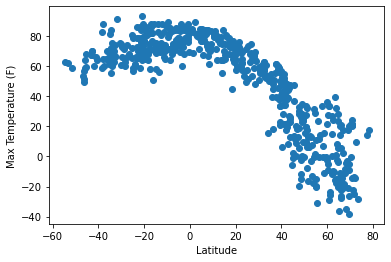

In [9]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

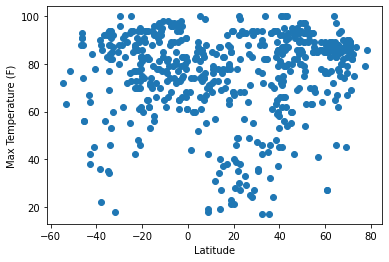

In [10]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Cloudiness Plot

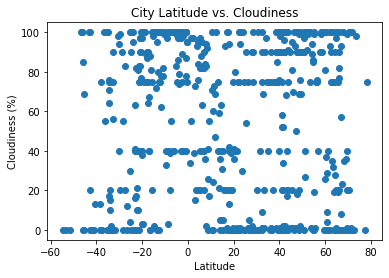

In [11]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

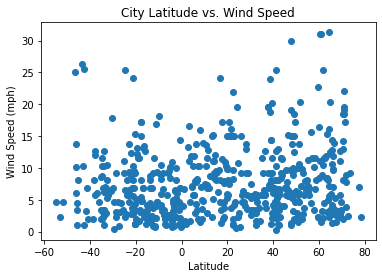

In [12]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [13]:
north_hem_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0, :]
north_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.6789,156.1250,27.86,89,98,9.98,RU,1612925460
2,Riyadh,24.6877,46.7219,49.33,57,0,2.30,SA,1612925283
3,Torbay,47.6666,-52.7314,28.13,86,90,29.93,CA,1612925460
4,Kahului,20.8947,-156.4700,70.54,46,40,17.27,US,1612925461
5,Taoudenni,22.6783,-3.9836,61.79,27,0,9.60,ML,1612925461


In [14]:
south_hem_df = weather_data_df.loc[weather_data_df["Latitude"] < 0, :]
south_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Atuona,-9.8000,-139.0333,79.39,77,33,18.19,PF,1612925460
7,Hithadhoo,-0.6000,73.0833,82.09,81,75,14.41,MV,1612925461
8,New Norfolk,-42.7826,147.0587,70.09,38,0,1.01,AU,1612925461
9,Vaini,-21.2000,-175.2000,78.80,89,75,24.16,TO,1612925416
11,Bredasdorp,-34.5322,20.0403,55.40,88,71,2.30,ZA,1612925462


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7884393269273102


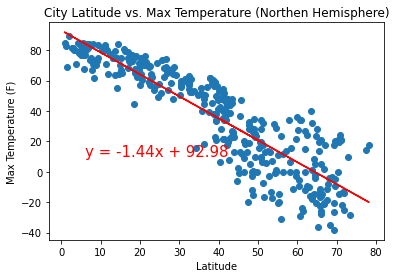

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Max Temperature"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Max Temperature"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_1, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (Northen Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.28940528788369063


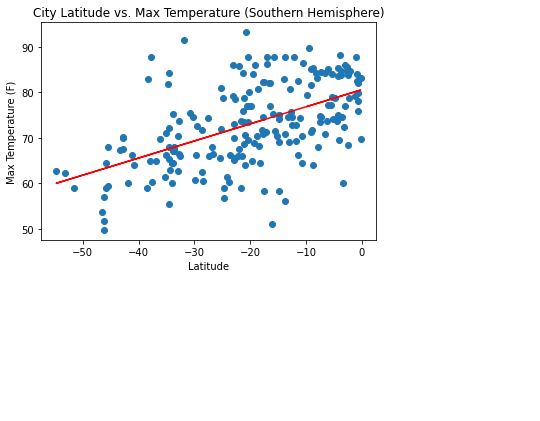

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Max Temperature"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Max Temperature"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_2, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09175030775835884


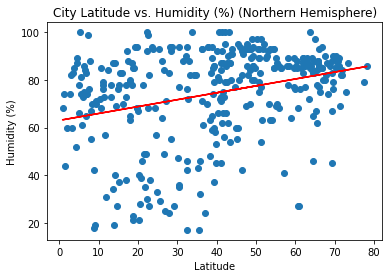

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Humidity"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Humidity"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_3, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.028867585394906855


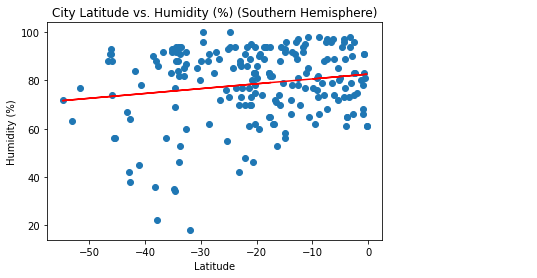

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Humidity"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Humidity"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_4, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00397286460970067


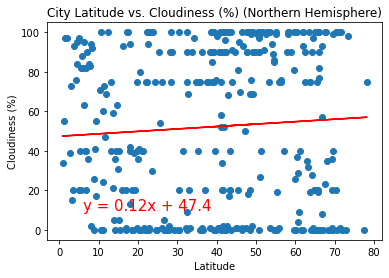

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Cloudiness"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Cloudiness"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_5, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18613554241008648


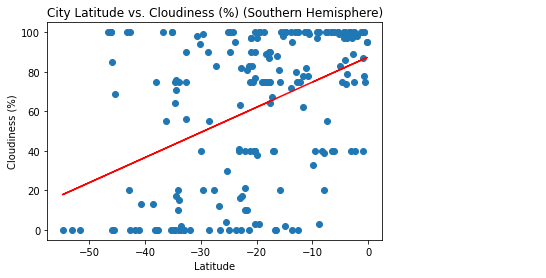

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Cloudiness"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Cloudiness"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_6, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005257690849195797


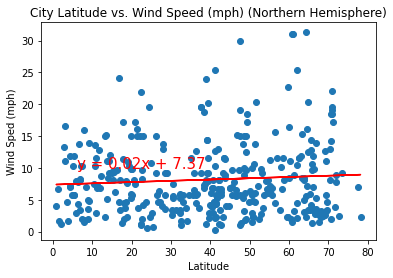

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Wind Speed"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Wind Speed"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_6, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Sped (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.029713045465663113


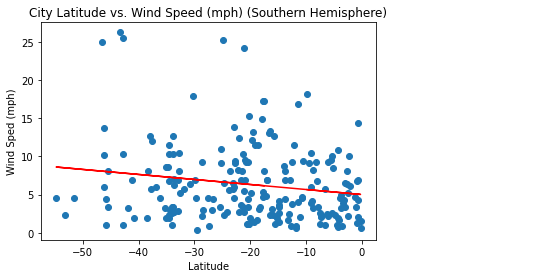

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Wind Speed"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Wind Speed"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_6, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Sped (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()